In [36]:
# Interplay of Hebbian and homeostatic plasticity in neuronal networks

# Intrinsic plasticity: Foldiak rate model
import numpy as np
import matplotlib.pyplot as plt

# Set model parameters
n_trials = 10000

N = 8                         # number of rows & columns in inputs
p_bar = 0.2                   # probability of vertical & horizontal bars in input                  
alpha_w = 10**(-4)              # learning rate for weights
ytarget = 10                  # output target 
tau_theta = 50                # time constant for theta
dt = 1

In [11]:
# Generate input patterns

def getPattern(N,p_bar):
    pattern = np.zeros([N,N])

    #vertical bars
    onbar = np.random.rand(N) < p_bar
    pattern[:,onbar]=1

    #horizontal bars
    onbar = np.random.rand(N) < p_bar;
    pattern[onbar,:]=1
    
    return pattern

def getBiasedPattern(N,p_bar):
    pattern = np.zeros([N,N])

    #vertical bars
    onbar = np.random.rand(N) < p_bar
    pattern[:,onbar]=1
    
    if np.random.rand() < 0.1: 
        pattern[:,3] = 1
        
    #horizontal bars
    onbar = np.random.rand(N) < p_bar;
    pattern[onbar,:]=1
    
    return pattern

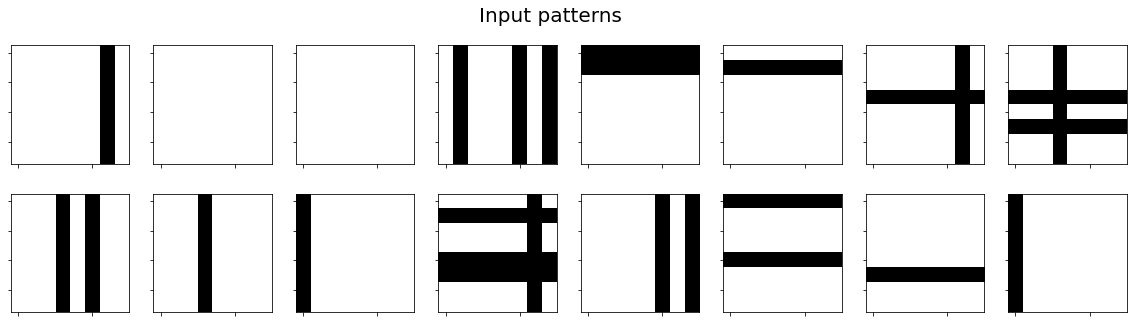

In [12]:
# Show Examples of input patterns
fig, axs = plt.subplots(2,8,figsize=(20,5))
fig.suptitle('Input patterns', fontsize=20)
for i in range(2):
    for j in range(8):
        axs[i,j].imshow(getPattern(8,0.1),cmap='binary')
        axs[i,j].set_yticklabels([])
        axs[i,j].set_xticklabels([])
plt.show()

In [13]:
# Initialize random weight matrix
w = np.zeros([N*N,n_trials])
w[:,0] = np.random.rand(N*N)

y = np.zeros([n_trials])         # output
theta = 5*np.ones([n_trials])    # sliding threshold theta

## Oja's rule: 
Oja's rule extracts the 1st principle component of the covariance matrix of the data

$ \Large y = \sum w_i x_i $ --> Linear output neuron

$ \Large\frac{dw}{dt} = \alpha ~ (xy - y^2w) $

In [14]:
def update_weights_Oja(x,y,w):
    return x*y-w*y**2

In [31]:
# Train network
for t in range(n_trials-1):
        
    #Generate pattern    
    #pattern = getPattern(N,p_bar)
    pattern = getBiasedPattern(N,p_bar)
            
    #Linearize pattern
    inputs = np.reshape(pattern,N*N)

    #Normalize overall "brightness" of each pattern
    scaling_factor = 2*N - 1 #avoid very small values for input
    if sum(inputs) != 0: #don't normalize if input is blank
        inputs = scaling_factor * inputs / sum(inputs)   
    
    #Calculate output    
    y[t] = np.dot(w[:,t],inputs)                                             # compute the output
    w[:,t+1] = w[:,t] + alpha_w*update_weights_Oja(inputs,y[t],w[:,t])       # update of the weights   

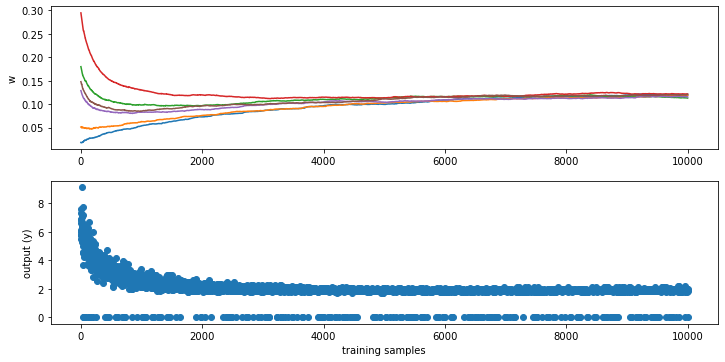

In [32]:
fig, axs = plt.subplots(2,figsize=(10,5))
fig.tight_layout()
axs[0].plot(w[0,:])
axs[0].plot(w[10,:])
axs[0].plot(w[20,:])
axs[0].plot(w[30,:])
axs[0].plot(w[40,:])
axs[0].plot(w[50,:])
axs[0].set(ylabel='w')

axs[1].scatter(np.arange(len(y)),y) 
axs[1].set(ylabel='output (y)',xlabel='training samples')
plt.show()

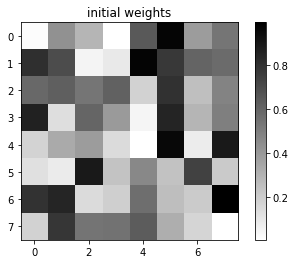

In [38]:
# Plot data       
weights = np.reshape(w[:,0],(N,N))
plt.imshow(weights,cmap='binary')
plt.colorbar()
plt.title('initial weights')
plt.show()

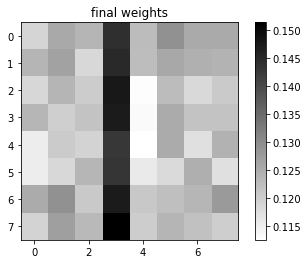

In [39]:
# Plot data       
weights = np.reshape(w[:,-1],(N,N))
#p = reshape(pattern,size,size)
plt.imshow(weights,cmap='binary')
plt.colorbar()
plt.title('final weights')
plt.show()

In [18]:
images = np.zeros([8,8,1000])
images.shape

(8, 8, 1000)

In [35]:
# Regular PCA
from sklearn.decomposition import PCA

images = np.zeros([64,1000])
for image in range(1000):
    images[:,image] = np.reshape(getPattern(8,0.1),64)

component = PCA(n_components=2)
output = component.fit(images)


In [30]:
print(output.singular_values_)

[27.42806806 26.31917002]
